In [24]:
import numpy as np
import matplotlib.pyplot as plt

from CommonModules.LoadMagneticField import read
from CommonModules.BiSplineDer import UniBiSpline
from CommonModules.BiSplineDer import BiSpline
from CommonModules.PlasmaEquilibrium import IntSample
from CommonModules.PlasmaEquilibrium import TokamakEquilibrium
from CommonModules.input_data import InputData
    

In [25]:
configfile = '/home/devlamin/WKbeam_simulations/TCV_85352_1.3_nofluct/RayTracing.txt'
idata = InputData(configfile)
Eq = TokamakEquilibrium(idata)

In [26]:
data_mag = read('/home/devlamin/WKbeam_simulations/TCV_85352_1.3_fluct/input')
R, z, Bfield, psi, psi_sep = data_mag
Raxis, Zaxis = Eq.magn_axis_coord_Rz

B_p = np.sqrt(Bfield[0]**2 + Bfield[1]**2)
q = np.sqrt((R - Raxis)**2 + (z - Zaxis)**2)*Bfield[2] / (R*B_p)

In [27]:
R_1d = R[:, 0]
z_1d = z[0, :]

Apparently it's already stored in rho, not in psi!

In [28]:
Ne_dat = np.loadtxt('/home/devlamin/WKbeam_simulations/TCV_85352_1.3_fluct/input/ne.dat', skiprows=1)
Ne, psi_Ne = Ne_dat[:, 1], Ne_dat[:, 0]
Te_dat = np.loadtxt('/home/devlamin/WKbeam_simulations/TCV_85352_1.3_fluct/input/Te.dat', skiprows=1)
Te, psi_Te = Te_dat[:, 1], Te_dat[:, 0]

In [29]:
PsiInt = BiSpline(R_1d, z_1d, psi)

In [30]:
NeInt = UniBiSpline(psi_Ne, Ne, PsiInt)
TeInt = UniBiSpline(psi_Te, Te, PsiInt)

In [31]:
Ne2d = IntSample(R_1d, z_1d, NeInt.eval).T
Te2d = IntSample(R_1d, z_1d, TeInt.eval).T

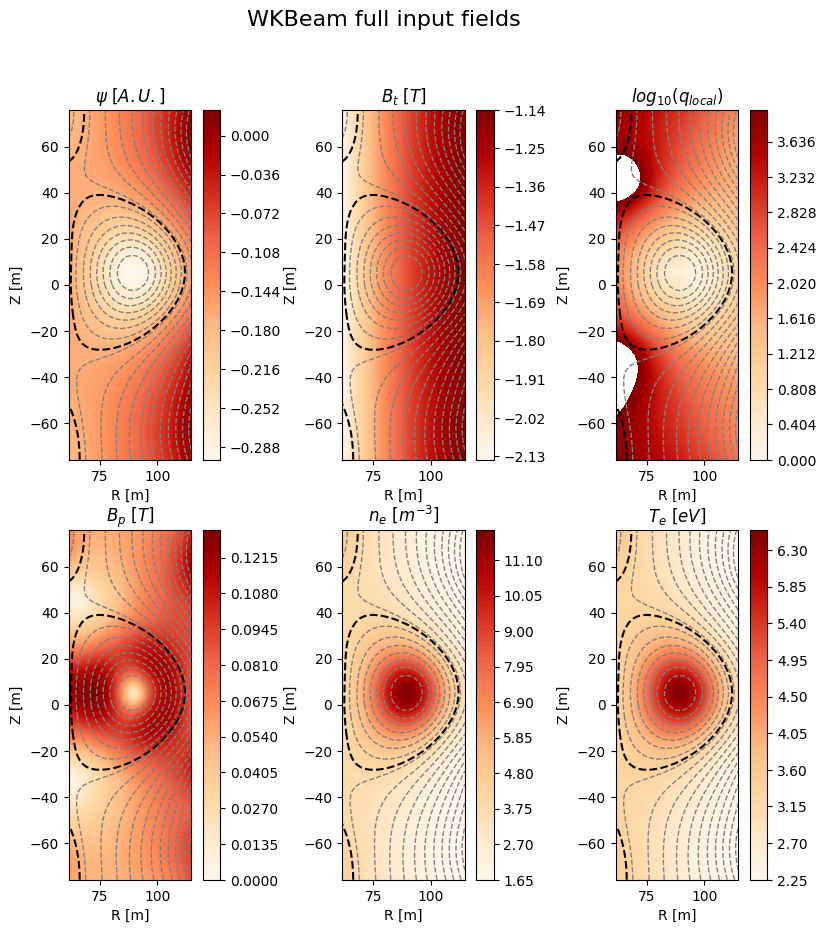

In [35]:
plt.figure(figsize=(10,10))
plt.suptitle(r'WKBeam full input fields', fontsize=16)

plot_psi = plt.subplot(2,3,1)
plot_psi.set_aspect('equal')
psi_grid =plot_psi.contourf(R, z, psi, levels=100, cmap='OrRd')
plot_psi.contour(R, z, psi, [psi_sep], colors='black')
plot_psi.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(psi_grid)
plot_psi.set_xlabel('R [m]')
plot_psi.set_ylabel('Z [m]')
plot_psi.set_title(r'$\psi\ [A.U.]$')

plot_Bt = plt.subplot(2,3,2)
plot_Bt.set_aspect('equal')
Bt_grid = plot_Bt.contourf(R, z, Bfield[2], levels=100, cmap='OrRd')
plot_Bt.contour(R, z, psi, [psi_sep], colors='black')
plot_Bt.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Bt_grid)
plot_Bt.set_xlabel('R [m]')
plot_Bt.set_ylabel('Z [m]')
plot_Bt.set_title(r'$B_t\ [T]$')

plot_q = plt.subplot(2,3,3)
plot_q.set_aspect('equal')
q_grid = plot_q.contourf(R, z, np.log(abs(q)), levels=np.linspace(0, 4, 100), cmap='OrRd')
plot_q.contour(R, z, psi, [psi_sep], colors='black')
plot_q.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(q_grid)
plot_q.set_xlabel('R [m]')
plot_q.set_ylabel('Z [m]')
plot_q.set_title(r'$log_{10}(q_{local})$')

plot_Bp = plt.subplot(2,3,4)
plot_Bp.set_aspect('equal')
Bp_grid = plot_Bp.contourf(R, z, B_p, levels=100, cmap='OrRd')
plot_Bp.contour(R, z, psi, [psi_sep], colors='black')
plot_Bp.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Bp_grid)
plot_Bp.set_xlabel('R [m]')
plot_Bp.set_ylabel('Z [m]')
plot_Bp.set_title(r'$B_p\ [T]$')

plot_ne = plt.subplot(2,3,5)
plot_ne.set_aspect('equal')
ne_grid = plot_ne.contourf(R, z, Ne2d, levels=100, cmap='OrRd')
plot_ne.contour(R, z, psi, [psi_sep], colors='black')
plot_ne.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(ne_grid)
plot_ne.set_xlabel('R [m]')
plot_ne.set_ylabel('Z [m]')
plot_ne.set_title(r'$n_e\ [m^{-3}]$')

plot_Te = plt.subplot(2,3,6)
plot_Te.set_aspect('equal')
Te_grid = plot_Te.contourf(R, z, Te2d, levels=100, cmap='OrRd')
plot_Te.contour(R, z, psi, [psi_sep], colors='black')
plot_Te.contour(R, z, psi, np.linspace(np.amin(psi), np.amax(psi), 20), colors='grey', linestyles='dashed', linewidths=1)
plt.colorbar(Te_grid)
plot_Te.set_xlabel('R [m]')
plot_Te.set_ylabel('Z [m]')
plot_Te.set_title(r'$T_e\ [eV]$')

plt.savefig('WKBeam_input_fields.pdf', dpi=300)
plt.show()